## Módulos usados durante o código:

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as acc
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

RANDOM_SEED = 42

## Carregando os datasets:

In [16]:
complete_data_train = pd.read_csv("complete_data_train.csv")

complete_data_test = pd.read_csv("complete_data_test.csv")

## Pegando a ordem das categorias:

In [17]:
def enumerate(dataset):
    classes = []
    
    for classe in dataset.label:
        if classe not in classes:
            classes.append(classe)
            
    return classes

classes = enumerate(complete_data_train)
print(classes)

['Hi-hat', 'Saxophone', 'Trumpet', 'Glockenspiel', 'Cello', 'Knock', 'Gunshot_or_gunfire', 'Clarinet', 'Computer_keyboard', 'Keys_jangling', 'Snare_drum', 'Writing', 'Laughter', 'Tearing', 'Fart', 'Oboe', 'Flute', 'Cough', 'Telephone', 'Bark', 'Chime', 'Bass_drum', 'Bus', 'Squeak', 'Scissors', 'Harmonica', 'Gong', 'Microwave_oven', 'Burping_or_eructation', 'Double_bass', 'Shatter', 'Fireworks', 'Tambourine', 'Cowbell', 'Electric_piano', 'Meow', 'Drawer_open_or_close', 'Applause', 'Acoustic_guitar', 'Violin_or_fiddle', 'Finger_snapping']


## Definindo as features a serem usadas e quais as colunas com as categorias:

In [18]:
x_train = complete_data_train[['F_1Q', 'F_2Q', 'F_IQR', 'F_max', 'F_mean', 'F_median',
       'F_min', 'F_std', 'SC_1Q', 'SC_2Q', 'SC_IQR', 'SC_max', 'SC_mean',
       'SC_median', 'SC_min', 'SC_std', 'SContr_1Q', 'SContr_2Q', 'SContr_IQR',
       'SContr_max', 'SContr_mean', 'SContr_median', 'SContr_min',
       'SContr_std', 'SF_1Q', 'SF_2Q', 'SF_IQR', 'SF_max', 'SF_mean',
       'SF_median', 'SF_min', 'SF_std', 'h1Q', 'h2Q',
       'hIQR', 'hmax', 'hmean', 'hmedian', 'hmin', 'hstd', 'htempo', 'p1Q',
       'p2Q', 'pIQR', 'pmax', 'pmean', 'pmedian', 'pmin', 'pstd', 'ptempo']]

y_train = complete_data_train['label']

x_test = complete_data_test[['F_1Q', 'F_2Q', 'F_IQR', 'F_max', 'F_mean', 'F_median',
       'F_min', 'F_std', 'SC_1Q', 'SC_2Q', 'SC_IQR', 'SC_max', 'SC_mean',
       'SC_median', 'SC_min', 'SC_std', 'SContr_1Q', 'SContr_2Q', 'SContr_IQR',
       'SContr_max', 'SContr_mean', 'SContr_median', 'SContr_min',
       'SContr_std', 'SF_1Q', 'SF_2Q', 'SF_IQR', 'SF_max', 'SF_mean',
       'SF_median', 'SF_min', 'SF_std', 'h1Q', 'h2Q',
       'hIQR', 'hmax', 'hmean', 'hmedian', 'hmin', 'hstd', 'htempo', 'p1Q',
       'p2Q', 'pIQR', 'pmax', 'pmean', 'pmedian', 'pmin', 'pstd', 'ptempo']]

y_test = complete_data_test['label']

## Realizando o Feature Scaling:

In [19]:
# Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Criando o modelo KNN e determinando sua acurácia:

In [20]:
# Criando o modelo:
knn_model = KNeighborsClassifier(n_neighbors=10, weights='distance')

# Dando fit no modelo:
knn_model.fit(x_train, y_train)

# Realizando a classificação:
y_knn = knn_model.predict(x_test)

# Calculando a acurácia:
knn_acc = acc(y_test, y_knn)

# Printando os resultados:
print("Acurácia KNN: {0}%".format(knn_acc * 100))

Acurácia KNN: 49.1875%


### Matriz de confusão para o KNN:

Text(0.5,0,'Predicted label')

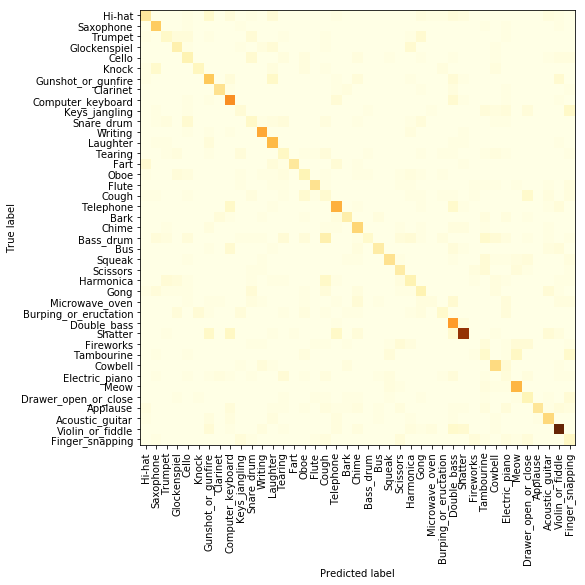

In [21]:
cm = confusion_matrix(y_test, y_knn)

plt.figure(figsize=(8, 8))

plt.imshow(cm, cmap=plt.cm.YlOrBr);

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)

plt.ylabel('True label')
plt.xlabel('Predicted label')

## Criando o modelo Random Forest e determinando sua acurácia:

In [22]:
# Criando o modelo:
rf_model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=RANDOM_SEED)

# Dando fit no modelo:
rf_model.fit(x_train, y_train)

# Realizando a classificação:
y_rf = rf_model.predict(x_test)

# Calculando a acurácia:
rf_acc = acc(y_test, y_rf)

# Printando os resultados:
print("Acurácia RF: {0}%".format(rf_acc * 100))

Acurácia RF: 60.875%


### Matriz de confusão para o Random Forest:

Text(0.5,0,'Predicted label')

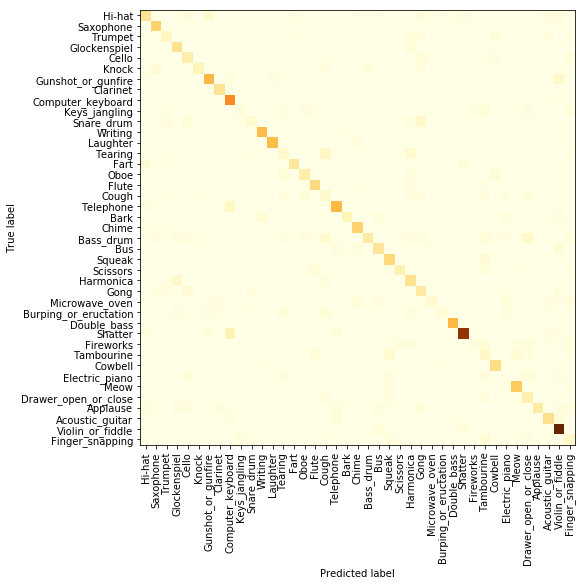

In [23]:
cm = confusion_matrix(y_test, y_rf)

plt.figure(figsize=(8, 8))

plt.imshow(cm, cmap=plt.cm.YlOrBr);

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)

plt.ylabel('True label')
plt.xlabel('Predicted label')

## Criando o modelo Gradient Boosting e determinando sua acurácia:

In [24]:
# Creating our Models
gb_model = GradientBoostingClassifier(random_state=RANDOM_SEED)

# Fitting the Models
gb_model.fit(x_train, y_train)

# Predicting the Categories
y_gb = gb_model.predict(x_test)

# Getting Accuracy
gb_acc = acc(y_test, y_gb)

# Printando os resultados:
print("Acurácia GB: {0}%".format(gb_acc * 100))

Acurácia GB: 55.00000000000001%


### Matriz de confusão para o Gradient Boosting:

Text(0.5,0,'Predicted label')

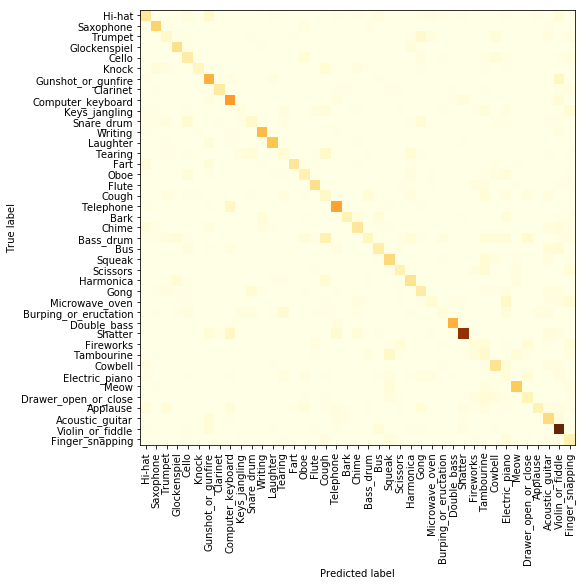

In [25]:
cm = confusion_matrix(y_test, y_gb)

plt.figure(figsize=(8, 8))

plt.imshow(cm, cmap=plt.cm.YlOrBr);

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)

plt.ylabel('True label')
plt.xlabel('Predicted label')

## Criando o modelo de regressão logística para verificar as melhores features:

In [29]:
from sklearn.linear_model import LogisticRegression

lmodel = LogisticRegression(penalty="l1", C=1e-2)

lmodel.fit(x_train, y_train)
yl = lmodel.predict(x_test)
lacc = acc(y_test, yl)

lmodel.coef_

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.01030897],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.24566787,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])